pouzite kniznice so far:
pandas ,scikit-learn, torch, seaborn


Task 1 - Data analysis:
(potrobnejšie info o data sete máme z https://www.kaggle.com/datasets/uciml/faulty-steel-plates )
Prvne sme zanalizovali veľkosť našeho data setu. Má 1941 položiek pričom každá položka má 34 stĺpcov.

Pokiaľ si zobereme čo aký stĺpec znamená, tak prvých 27 mi určuje parametre položky (v našom prípade sa jedná o Oceľové Pláty). Parametre sú celočíeslne (14 stĺpcov) alebo reálne (13. stĺpcov) hodnoty. Niektoré tieto parametre sú napríklad:

X_Minimum
X_Maximum
Y_Minimum
Y_Maximum
Pixels_Areas
X_Perimeter
Y_Perimeter
Sum_of_Luminosity
Minimum_of_Luminosity ...

Posledných 7 stĺpcov nám určuje či daná položka ma nejakú vadu. Prvých 6 je nejaká konkrétna vada a posledná nam určuje či položka je vadná (0) alebo nie (1). Tieto stĺpce máju boolovsku hodnotu (čiže 0 alebo 1). Pričom 0 znamená, že daná položka nemá túto vadu a 1 zase znamená, že túto vadu obsahuje. Možné vady sú:

    Pastry
    Z_Scratch
    K_Scatch
    Stains
    Dirtiness
    Bumps

Data set neobsahuje žiadne chýbajúce hodnoty.

In [34]:
import pandas as pd

df = pd.read_csv("faults.csv")
print(df.shape)

print("Mame chybajuce hodnoty?")
print(df.isna().sum().sum())
print("Mame duplikaty?")
print(df.duplicated().sum())


(1941, 34)
Mame chybajuce hodnoty?
0
Mame duplikaty?
0


Data preprocessing, Normalization and Data Split

Keďže nemáme chýbajúce hodnoty ani duplikátne hodnoty môžeme ísť rovno k ďaľším krokom. Zistíme si koreláciu medzi dátami v našom data sete pomocou "Heatmap". Najrpv medzi vstupnými dátami, kde vidíme, že medzi niektorími vstupnými dátami je vysoká priama korelácia, to znaméná že narastajú vzájomne lineárne a neskôr do MLPčka by nepridávali žiadne nové dáta.





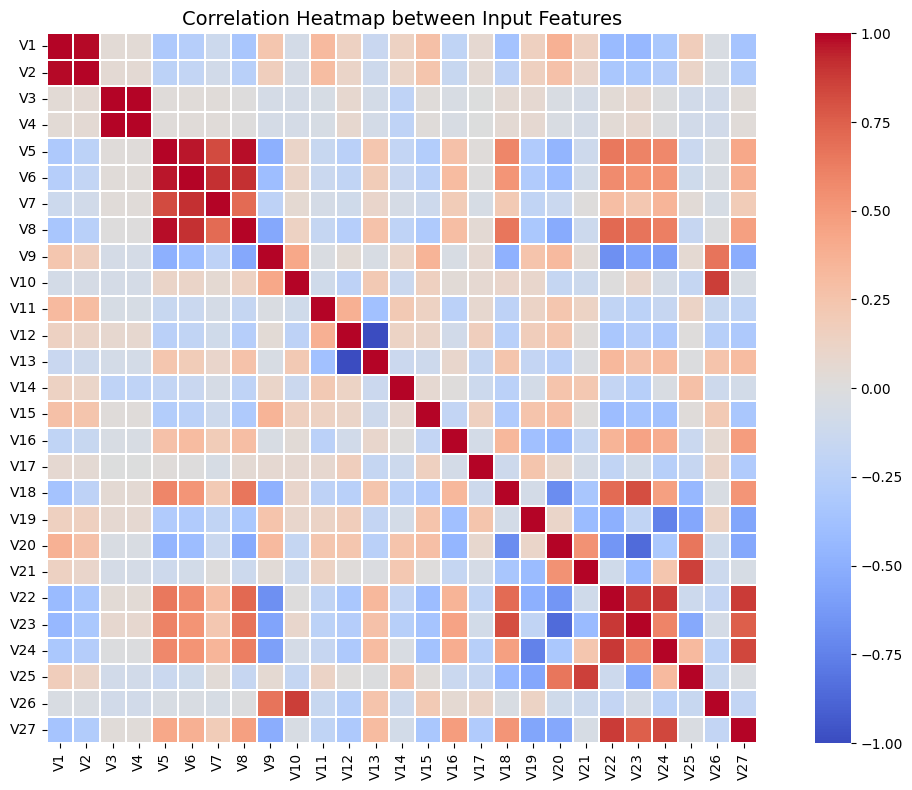

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("faults.csv")

# Select only input features (V1–V27)
input_columns = [f"V{i}" for i in range(1, 28)]  # up to 27 inclusive
input_df = df[input_columns]
corr = input_df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,
    linewidths=0.3,
    square=True
)
plt.title("Correlation Heatmap between Input Features", fontsize=14)
plt.tight_layout()
plt.show()


Z korelačnej heatmapy je viditeľné, že niektoré vstupné atribúty (napr. V22, V23) silno korelujú s konkrétnymi typmi chýb (V29, V30), zatiaľ čo iné majú opačný – záporný vzťah. Korelácia so stĺpcom Class je však nízka, čo naznačuje, že žiadna premenná sama o sebe nedokáže spoľahlivo určiť chybnosť vzorky.

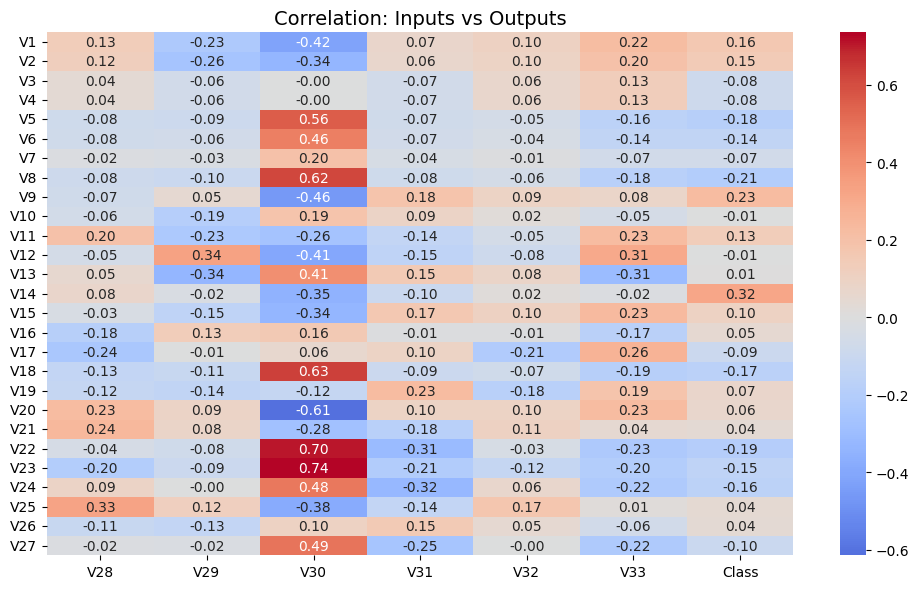

In [36]:

df = pd.read_csv("faults.csv")

fault_columns = ['V28', 'V29', 'V30', 'V31', 'V32', 'V33']
input_columns = [f"V{i}" for i in range(1, 28)]  # V1–V27

outputs = fault_columns + (['Class'] if 'Class' in df.columns else [])

corr = df[input_columns + outputs].corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr.loc[input_columns, outputs],
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    center=0
)
plt.title("Correlation: Inputs vs Outputs", fontsize=14)
plt.tight_layout()
plt.show()


Z korelačnej heatmapy vstupných parametrov vyplýva, že viacero atribútov vykazuje silnú lineárnu závislosť (|r| > 0.9).

Je viacero dvojíc, ktoré majú priamu alebo nepriamu linearnu koreláciu, napríklad V1-V2 , V3-V4, V5-V6, V5-V8 , V12-V13 , V20-V23. Z každej dvojice, ponecháme jednu premennú, čiže odstránime V2,V4,V6,V8,V13 a V21.

In [44]:
df = pd.read_csv("faults.csv")

cols_to_drop = ['V2', 'V4', 'V6', 'V8', 'V21']
df_reduced = df.drop(
    columns=['V2', 'V4', 'V6', 'V8', 'V21'], errors='ignore')

df_reduced.to_csv(
    "data_manipulation/faults_reduced.csv"
    , index=False)